In [47]:
import pandas as pd
import numpy as np
import csv
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import librosa
import gdown
import soundfile as sf
from scipy.signal import butter, filtfilt

import audiosegment
from include import helpers

In [48]:
#important parameters for audio processing
base_folder_path = "/Users/gabrielalvesiervolino/Desktop/Coding/machineLearning/final_project/audio_processing/data"
audio_path = [base_folder_path+"/barbie/", base_folder_path+"/puppy/"]

for i in audio_path:
    print(os.listdir(i))

['barbie_28.wav', 'barbie_14.wav', 'barbie_15.wav', 'barbie_29.wav', 'barbie_17.wav', 'barbie_16.wav', 'barbie_8.wav', 'barbie_12.wav', 'barbie_13.wav', 'barbie_9.wav', 'barbie_11.wav', 'barbie_39.wav', 'barbie_38.wav', 'barbie_10.wav', 'barbie_48.wav', 'barbie_49.wav', 'barbie_42.wav', 'barbie_43.wav', 'barbie_41.wav', 'barbie_40.wav', 'barbie_44.wav', 'barbie_45.wav', 'barbie_47.wav', 'barbie_46.wav', 'barbie_7.wav', 'barbie_21.wav', 'barbie_35.wav', 'barbie_34.wav', 'barbie_20.wav', 'barbie_6.wav', 'barbie_4.wav', 'barbie_36.wav', 'barbie_22.wav', 'barbie_23.wav', 'barbie_37.wav', 'barbie_5.wav', 'barbie_1.wav', 'barbie_33.wav', 'barbie_27.wav', 'barbie_26.wav', 'barbie_32.wav', 'barbie_0.wav', 'barbie_2.wav', 'barbie_24.wav', 'barbie_30.wav', 'barbie_18.wav', 'barbie_19.wav', 'barbie_31.wav', 'barbie_25.wav', 'barbie_3.wav']
['puppy_21.wav', 'puppy_35.wav', 'puppy_34.wav', 'puppy_20.wav', 'puppy_36.wav', 'puppy_22.wav', 'puppy_8.wav', 'puppy_9.wav', 'puppy_23.wav', 'puppy_37.wav', 

In [49]:
def plot_spectrogram(db):
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(db, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram')
    plt.tight_layout()
    plt.show()


[[-42.392944 -37.154606 -36.26569  ... -33.12175  -37.439274 -42.819168]
 [-44.230503 -41.764755 -42.329357 ... -38.96338  -39.89744  -55.511032]
 [-49.8443   -58.486595 -70.40001  ... -46.858406 -42.143696 -38.20862 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


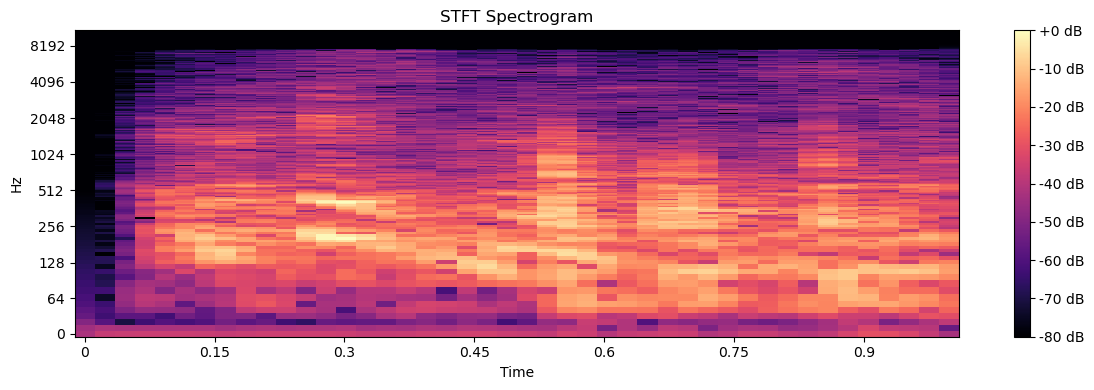

In [50]:
compute_list = []
n_fft=2048
hop_length=512

for i in audio_path:
    for j in os.listdir(i):
        y, sr = librosa.load(i+j)
        normalized = librosa.util.normalize(y)

        stft = librosa.core.stft(normalized, n_fft=n_fft, hop_length=hop_length)
        stft_db = librosa.amplitude_to_db(abs(stft), ref=np.max)

        print(stft_db)

        plot_spectrogram(stft_db)
        break
    break



